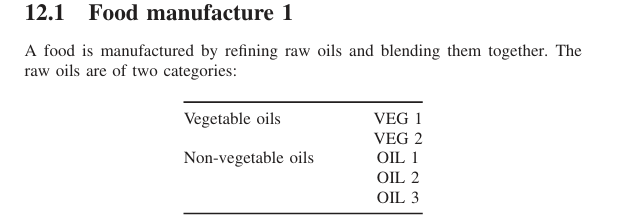
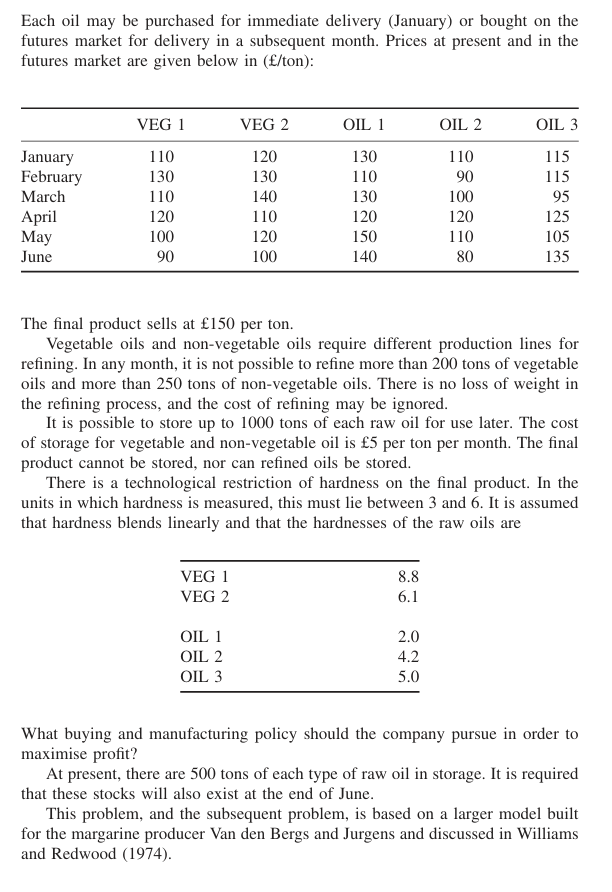

In [3]:
import gurobipy as gp
from gurobipy import GRB

model = gp.Model('Food Manufacturer')

## Defining lists, dictionaries ##
months = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June'}
oils = {1:'Veg 1',2:'Veg 2',3:'Oil 1',4:'Oil 2',5:'Oil 3'}

cost_per_ton = {
    (1,1):110,(1,2):130,(1,3):110,(1,4):120,(1,5):100,(1,6):90,
    (2,1):120,(2,2):130,(2,3):140,(2,4):110,(2,5):120,(2,6):100,
    (3,1):130,(3,2):110,(3,3):130,(3,4):120,(3,5):150,(3,6):140,
    (4,1):110,(4,2):90,(4,3):100,(4,4):120,(4,5):110,(4,6):80,
    (5,1):115,(5,2):115,(5,3):95,(5,4):125,(5,5):105,(5,6):135
}  ## Buying Cost of oil i in month j

hardness = {1:8.8,2:6.1,3:2,4:4.2,5:5}   ## Hardness of each type of oil
profit_per_ton = 150
holding_cost_per_ton = 5

## Defining Variables ##
s = model.addVars(cost_per_ton.keys(),vtype = GRB.CONTINUOUS,name = 's') ## Inventory of each oil at the start of each month
e = model.addVars(cost_per_ton.keys(),vtype = GRB.CONTINUOUS,name = 'e') ## Inventory of each oil  at the end of each month
x = model.addVars(cost_per_ton.keys(),vtype = GRB.CONTINUOUS,name = 'x')  ## Amount of each oil bought in each month
r = model.addVars(cost_per_ton.keys(),vtype = GRB.CONTINUOUS,name = 'r')  ## Amount of oil refined in each month,whatever is refined is sold in that month itself


## Objective Function ##
inventory_cost = gp.quicksum(e[i,j]*holding_cost_per_ton for i,j in cost_per_ton.keys())
buying_cost = gp.quicksum(x[i,j]*cost_per_ton[(i,j)] for i,j in cost_per_ton.keys())
selling_price = gp.quicksum(r[i,j]*profit_per_ton for i,j in cost_per_ton.keys())


model.setObjective(selling_price - buying_cost - inventory_cost,GRB.MAXIMIZE)

## Adding Constraints ##

## Oil Refining Constraints ##
for j in months.keys():
        model.addConstr(gp.quicksum(r[i,j] for i in [1,2]) <= 200)
        model.addConstr(gp.quicksum(r[i,j] for i in [3,4,5]) <= 250)


## Inventory Constraints
for i in oils.keys():
    model.addConstr(s[i,1] == 500)  ## Inventory at the starting of January
    model.addConstr(e[i,6] == 500)  ## Inventory at the ending of June

for i in oils.keys():
    for j in months.keys():
        model.addConstr(s[i,j] <= 1000)   ## Inventory at the start of each month
        model.addConstr(e[i,j] <= 1000)   ## Inventory at the end of each month

## Inventory Flow Constraints ##
for i in oils.keys():
    for j in months.keys():
        model.addConstr(e[i,j] == s[i,j] + x[i,j] - r[i,j])   ## Inventory at the end of each month
        if j > 1:
            model.addConstr(s[i,j] == e[i,j-1])    ## Starting inventory of next month will be the ending inventory of this month

for j in months.keys():
    model.addConstr(gp.quicksum(hardness[i]*r[i,j] for i in oils.keys()) >= 3*gp.quicksum(r[i,j] for i in oils.keys()))
    model.addConstr(gp.quicksum(hardness[i]*r[i,j] for i in oils.keys()) <= 6*gp.quicksum(r[i,j] for i in oils.keys()))

        
model.optimize()

if model.status == GRB.OPTIMAL:
    for j in months.keys():
        total_blend = sum(r[i,j].X for i in oils.keys())
        print(f'Total tons of product produced in month {j}: {total_blend}')

        for i in oils.keys():
            print(f'Oil {i}')
            print(f'\n Starting Inventory in month {j}: {s[i,j].X:,.1f}')
            print(f'\n Amount bought in month {j} : {x[i,j].X:,.1f}')
            print(f'\n Amount refined in month {j} : {r[i,j].X:,.1f}')
            print(f'\n Ending Inventory in month {j} : {e[i,j].X:,.1f}')
            
    print(f'Maximized Profit : ${model.ObjVal:,.2f}')

else:
    print('Optimal Solution Not Found')
            

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-1360P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 149 rows, 120 columns and 330 nonzeros
Model fingerprint: 0x90ac4b2f
Coefficient statistics:
  Matrix range     [1e-01, 6e+00]
  Objective range  [5e+00, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+02, 1e+03]
Presolve removed 95 rows and 35 columns
Presolve time: 0.01s
Presolved: 54 rows, 85 columns, 200 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.8475778e+05   1.550638e+03   0.000000e+00      0s
      40    1.0784259e+05   0.000000e+00   0.000000e+00      0s

Solved in 40 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.078425926e+05
Total tons of product produced in month 1: 450.0
Oil 1

 Starting Inventory in month 1: 500.0

 Amount bought in

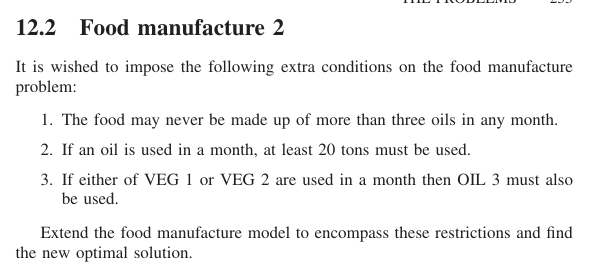

In [6]:
import gurobipy as gp
from gurobipy import GRB

model = gp.Model('Food Manufacturer')

## Defining lists, dictionaries ##
months = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June'}
oils = {1:'Veg 1',2:'Veg 2',3:'Oil 1',4:'Oil 2',5:'Oil 3'}

cost_per_ton = {
    (1,1):110,(1,2):130,(1,3):110,(1,4):120,(1,5):100,(1,6):90,
    (2,1):120,(2,2):130,(2,3):140,(2,4):110,(2,5):120,(2,6):100,
    (3,1):130,(3,2):110,(3,3):130,(3,4):120,(3,5):150,(3,6):140,
    (4,1):110,(4,2):90,(4,3):100,(4,4):120,(4,5):110,(4,6):80,
    (5,1):115,(5,2):115,(5,3):95,(5,4):125,(5,5):105,(5,6):135
}  ## Buying Cost of oil i in month j

hardness = {1:8.8,2:6.1,3:2,4:4.2,5:5}   ## Hardness of each type of oil
profit_per_ton = 150
holding_cost_per_ton = 5

## Defining Variables ##
s = model.addVars(cost_per_ton.keys(),vtype = GRB.CONTINUOUS,name = 's') ## Inventory of each oil at the start of each month
e = model.addVars(cost_per_ton.keys(),vtype = GRB.CONTINUOUS,name = 'e') ## Inventory of each oil  at the end of each month
x = model.addVars(cost_per_ton.keys(),vtype = GRB.CONTINUOUS,name = 'x')  ## Amount of each oil bought in each month
r = model.addVars(cost_per_ton.keys(),vtype = GRB.CONTINUOUS,name = 'r')  ## Amount of oil refined in each month,whatever is refined is sold in that month itself
b = model.addVars(cost_per_ton.keys(),vtype = GRB.BINARY,name = 'b')   ## Binary variable to decide if oil i will be used in month j or not

## Objective Function ##
inventory_cost = gp.quicksum(e[i,j]*holding_cost_per_ton for i,j in cost_per_ton.keys())
buying_cost = gp.quicksum(x[i,j]*cost_per_ton[(i,j)] for i,j in cost_per_ton.keys())
selling_price = gp.quicksum(r[i,j]*profit_per_ton for i,j in cost_per_ton.keys())


model.setObjective(selling_price - buying_cost - inventory_cost,GRB.MAXIMIZE)

## Adding Constraints ##

## Oil Refining Constraints ##
for j in months.keys():
        model.addConstr(gp.quicksum(r[i,j] for i in [1,2]) <= 200)
        model.addConstr(gp.quicksum(r[i,j] for i in [3,4,5]) <= 250)


## Inventory Constraints
for i in oils.keys():
    model.addConstr(s[i,1] == 500)  ## Inventory at the starting of January
    model.addConstr(e[i,6] == 500)  ## Inventory at the ending of June

for i in oils.keys():
    for j in months.keys():
        model.addConstr(s[i,j] <= 1000)   ## Inventory at the start of each month
        model.addConstr(e[i,j] <= 1000)   ## Inventory at the end of each month

## Inventory Flow Constraints ##
for i in oils.keys():
    for j in months.keys():
        model.addConstr(e[i,j] == s[i,j] + x[i,j] - r[i,j])   ## Inventory at the end of each month
        if j > 1:
            model.addConstr(s[i,j] == e[i,j-1])    ## Starting inventory of next month will be the ending inventory of this month

for j in months.keys():
    model.addConstr(gp.quicksum(hardness[i]*r[i,j] for i in oils.keys()) >= 3*gp.quicksum(r[i,j] for i in oils.keys()))
    model.addConstr(gp.quicksum(hardness[i]*r[i,j] for i in oils.keys()) <= 6*gp.quicksum(r[i,j] for i in oils.keys()))

for j in months.keys():
    model.addConstr(gp.quicksum(b[i,j] for i in oils.keys()) <= 3)   ## No more than 3 oils to be used

for i in oils.keys():
    for j in months.keys():
        model.addConstr(r[i,j] >= 20*b[i,j])
        model.addConstr(r[i,j] <= 1000*b[i,j])
        
for j in months.keys():
    model.addConstr(b[1,j] <= b[5,j])
    model.addConstr(b[2,j] <= b[5,j])
    
model.optimize()

if model.status == GRB.OPTIMAL:
    for j in months.keys():
        total_blend = sum(r[i,j].X for i in oils.keys())
        print(f'Total tons of product produced in month {j}: {total_blend}')

        for i in oils.keys():
            print(f'Oil {i}')
            print(f'\n Starting Inventory in month {j}: {s[i,j].X:,.1f}')
            print(f'\n Amount bought in month {j} : {x[i,j].X:,.1f}')
            print(f'\n Amount refined in month {j} : {r[i,j].X:,.1f}')
            print(f'\n Ending Inventory in month {j} : {e[i,j].X:,.1f}')
            
    print(f'Maximized Profit : ${model.ObjVal:,.2f}')

else:
    print('Optimal Solution Not Found')
            

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-1360P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 227 rows, 150 columns and 504 nonzeros
Model fingerprint: 0x2d7f51d7
Variable types: 120 continuous, 30 integer (30 binary)
Coefficient statistics:
  Matrix range     [1e-01, 1e+03]
  Objective range  [5e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+03]
Found heuristic solution: objective -18750.00000
Presolve removed 105 rows and 75 columns
Presolve time: 0.00s
Presolved: 122 rows, 75 columns, 324 nonzeros
Found heuristic solution: objective -6250.000000
Variable types: 45 continuous, 30 integer (30 binary)

Root relaxation: objective 1.071833e+05, 46 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth In